In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cleaned.csv')
print(df.head())

   item_id  user_id  rating  timestamp  gender    category    brand  year  \
0        7      131       4      36692  Female  Home Audio  Philips  2000   
1       19      231       5      36891  Female      Camera    Canon  2000   
2       14      233       5      36893  Female      Camera    Kodak  2001   
3       14      257       5      36926  Female      Camera    Kodak  2001   
4       14      269       5      36952  Female      Camera    Kodak  2001   

   month  quantity  unitprice  amount  
0      6         5       6360   31800  
1     12        10       9955   99550  
2      1         9       7639   68751  
3      2         7       5097   35679  
4      3        10       6472   64720  


In [5]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df['category'].unique())
print(df['brand'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB
None
item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64
            item_id       user_id        rating     timestamp          year  \
count  45166.00000

C:\Users\yuvra\AppData\Local\Temp\ipykernel_26216\332910665.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='amount', data=df, estimator='sum', ci=None)


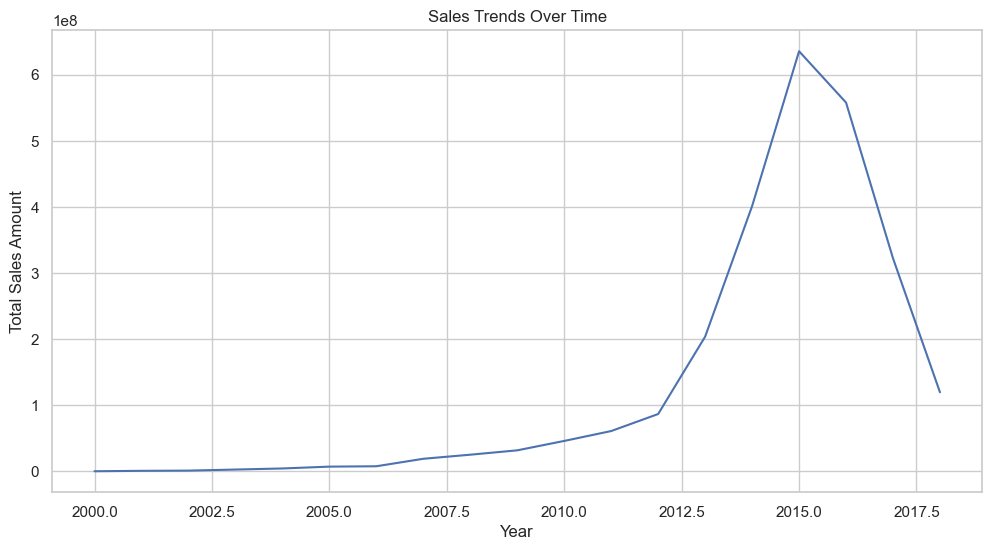

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='amount', data=df, estimator='sum', ci=None)
plt.title('Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.show()

C:\Users\yuvra\AppData\Local\Temp\ipykernel_26216\3956232285.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))


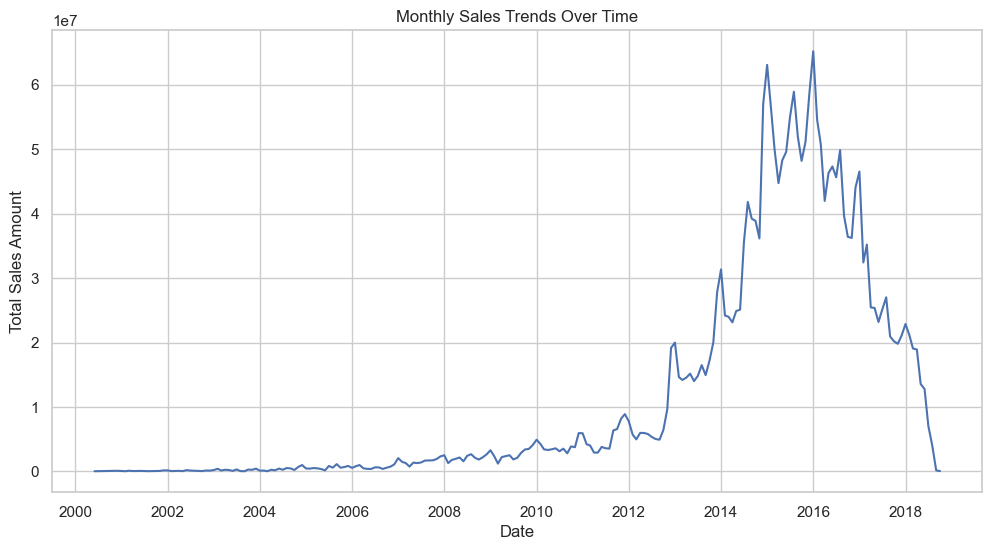

In [7]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
monthly_sales = df.groupby('date')['amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='amount', data=monthly_sales)
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

Top Selling Products by Quantity:
item_id
1575    11179
2031    10000
111      7123
1124     5920
647      5179
2129     4497
3106     3942
6689     3861
3403     3762
5054     3741
Name: quantity, dtype: int64
Top Selling Products by Sales Amount:
item_id
1575    83407671
2031    75078926
111     53482601
1124    44537250
647     38648962
2129    33779337
3106    29366998
6689    28683497
3403    28437525
5054    28181331
Name: amount, dtype: int64


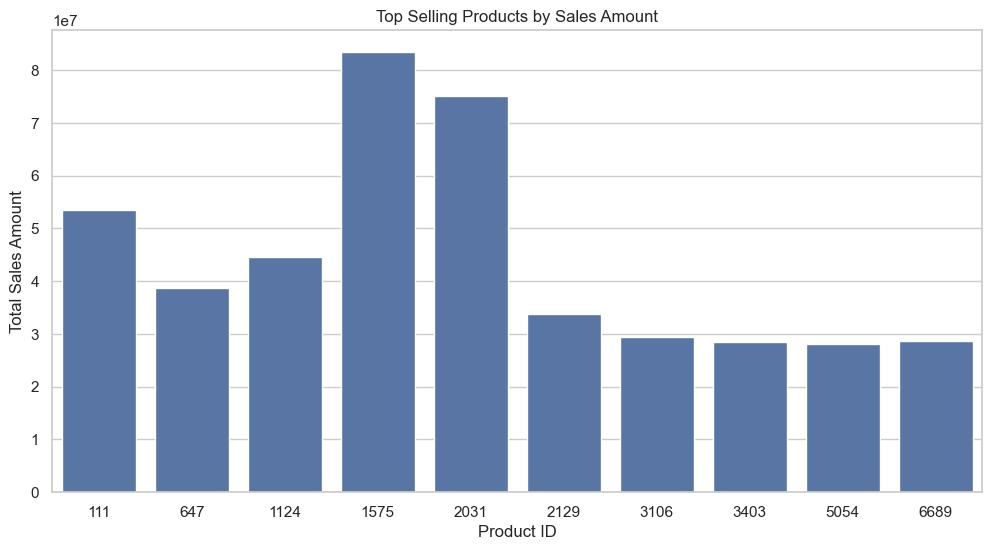

In [11]:
# Top selling products by quantity
top_products_quantity = df.groupby('item_id')['quantity'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products by Quantity:")
print(top_products_quantity)

# Top selling products by sales amount
top_products_amount = df.groupby('item_id')['amount'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products by Sales Amount:")
print(top_products_amount)

# Visualize top selling products by sales amount
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_amount.index, y=top_products_amount.values)
plt.title('Top Selling Products by Sales Amount')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Amount')
plt.show()

In [12]:
monthly_sales.to_csv('monthly_sales.csv', index=False)
top_products_quantity.to_csv('top_products_quantity.csv')
top_products_amount.to_csv('top_products_amount.csv')